# Stability of Various Models

In [1]:
import requests as req, os
import importlib.util

URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]

if not os.path.isfile(File[0]):
    print('Basic files not` found - downloading it')
    for dfile in File:
        if not os.path.isfile(dfile):
            print(dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

print('Basic file found')
%run basic_material.py

from control.matlab import tf,step, tf2ss, ss2tf, bode
from control_materials import *
import numpy as np
import matplotlib.pyplot as plt

Basic file found
Running Python: 3.12.8
Running Sympy: 1.13.2
Control Package Found
This is a library of useful functions for the control systems in 16.06


# Lecture 6-4


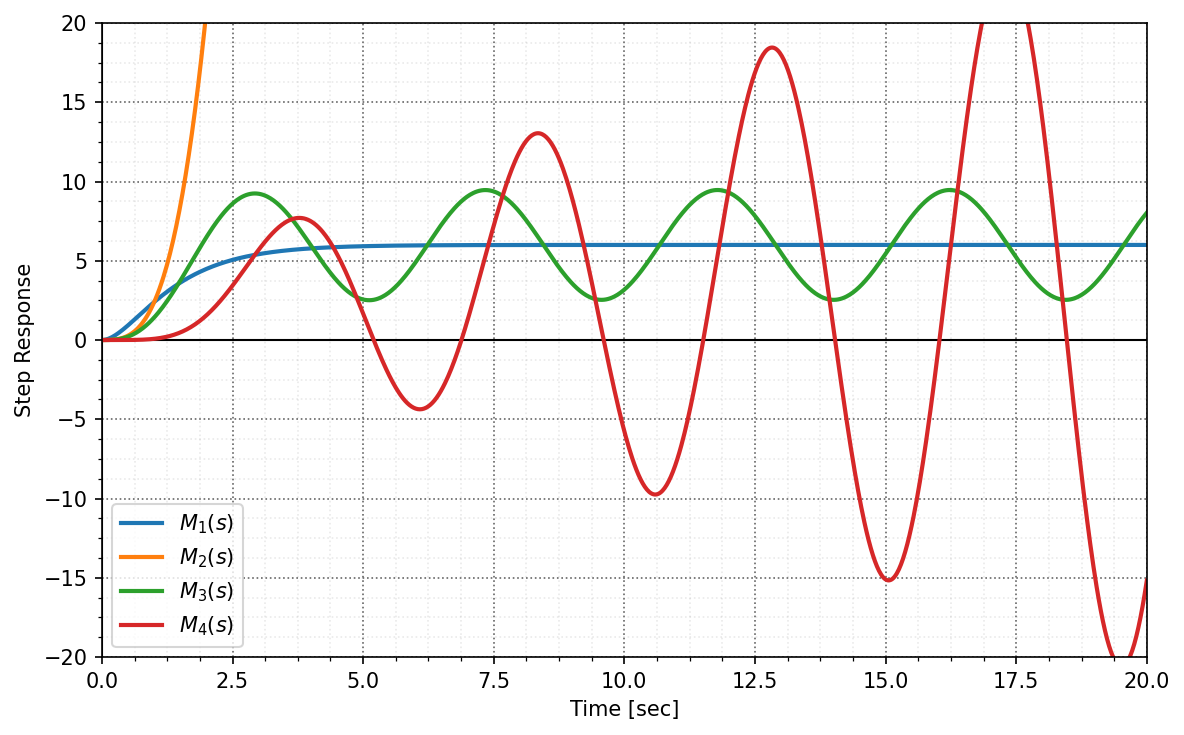

In [ ]:
zeta = 0.5
wn = 1
tt = np.linspace(0,20,1000)
fig, ax = plt.subplots(1,figsize=(8, 5),dpi=150,sharex = True)
ax.set_xlabel("Time [sec]")
ax.set_ylabel("Step Response")
nicegrid(ax)

T0 = tf((1), (1,1))
T1 = tf((1), (1,2))
T2 = tf((1), (1,0,2))
T3 = tf((1), (1,-1))
G0 = 12*T1*T0
G1 = 12*T3*T2
G2 = 12*T0*T2
G3 = 12*T0*T2**2

[yy0,tt] = step(G0,tt)
[yy1,tt] = step(G1,tt)
[yy2,tt] = step(G2,tt)
[yy3,tt] = step(G3,tt)

ax.plot(tt,yy0,label=r'$M_1(s)$')
ax.plot(tt,yy1,label=r'$M_2(s)$')
ax.plot(tt,yy2,label=r'$M_3(s)$')
ax.plot(tt,yy3,label=r'$M_4(s)$')
ax.legend()
ax.set_ylim((-20,20))
savefig("./figs/Ex84.pdf", dpi=600)
plt.show()